<a href="https://colab.research.google.com/github/jaki729/IntrusionDetection-in-IoT_using_Medical_and_Network-Data/blob/main/IOT_Medical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# START


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ColabData/IoTM/Iotmdata.csv')

# **DATASET DESCRIPTION**

In [ ]:
print("Data has {} rows & {} columns".format(data.shape[0],data.shape[1]))

Data has 16318 rows & 38 columns


In [ ]:
print(data.head(5))

   Sport  Dport  SrcBytes  DstBytes   SrcLoad  DstLoad  SrcGap  DstGap  \
0  58059   1111       496       186  276914.0  92305.0       0       0   
1  58062   1111       496       186  230984.0  76995.0       0       0   
2  58065   1111       496       186  218470.0  72823.0       0       0   
3  58067   1111       496       186  203376.0  67792.0       0       0   
4  58069   1111       496       186  235723.0  78574.0       0       0   

    SIntPkt  DIntPkt  ...  Packet_num  Temp  SpO2  Pulse_Rate  SYS  DIA  \
0  3.582333   1.9015  ...           1  28.9     0           0    0    0   
1  4.294667   2.9015  ...           2  28.9     0           0    0    0   
2  4.540667   3.2945  ...           3  28.9    89         104    0    0   
3  4.877667   3.3320  ...           4  28.9    89         104    0    0   
4  4.208333   2.8635  ...           5  28.9    89         101    0    0   

   Heart_rate  Resp_Rate   ST  Label  
0           0          0  0.0      0  
1          78         17  

In [ ]:
print(data.tail(5))

       Sport  Dport  SrcBytes  DstBytes   SrcLoad  DstLoad  SrcGap  DstGap  \
16313  57348   1111       496       186  205128.0  68376.0       0       0   
16314  63265   1111       496       186  274058.0  91353.0       0       0   
16315  63918   1111       496       186  288568.0  96189.0       0       0   
16316  52345   1111       496       186  237795.0  79265.0       0       0   
16317  63969   1111       496       186  278730.0  92910.0       0       0   

        SIntPkt  DIntPkt  ...  Packet_num  Temp  SpO2  Pulse_Rate  SYS  DIA  \
16313  4.836000   2.7995  ...       16310  27.7    98          73  148   84   
16314  3.619667   1.9535  ...       16311  27.7    98          73  148   84   
16315  3.437667   2.2180  ...       16312  23.6    98          73  148   84   
16316  4.171667   2.3420  ...       16313  27.4    98          73  148   84   
16317  3.559000   2.3435  ...       16314  27.2    98          73  148   84   

       Heart_rate  Resp_Rate   ST  Label  
16313        

In [ ]:
columns=["SrcAddr","DstAddr","Sport","Dport","SrcBytes","DstBytes","SrcLoad","DstLoad",
         "SrcGap","DstGap","SIntPky","DIntPkt","SIntPktAct","DIntPktAct","SrcJitter","DstJitter","sMaxPktSz","dMaxPktSz",
         "sMinPktSz","dMinPktSz","Dur","Trans","TotPkts","TotBytes","Load","Loss","pLoss","pSrcLoss","pDstLoss","Rate",
         "SrcMac","DstMac","Packet_num","Temp","Sp02","Pulse_Rate","SYS","DIA","Heart_Rate","Resp_Rate","ST","Label"]

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sport,16318.0,57358.753646,4725.344520,49152.000000,53272.250000,57363.500000,61450.750000,6.553500e+04
Dport,16318.0,1111.000000,0.000000,1111.000000,1111.000000,1111.000000,1111.000000,1.111000e+03
SrcBytes,16318.0,496.650264,28.584642,310.000000,496.000000,496.000000,496.000000,2.298000e+03
DstBytes,16318.0,187.077706,18.688525,120.000000,186.000000,186.000000,186.000000,8.820000e+02
SrcLoad,16318.0,211840.633005,79429.880071,0.000000,199053.500000,236679.000000,261557.000000,1.134000e+06
DstLoad,16318.0,71024.354940,45308.106133,507.447000,66355.000000,78893.000000,87193.000000,3.938000e+06
SrcGap,16318.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
DstGap,16318.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
SIntPkt,16318.0,10.946755,101.230484,0.875000,3.792667,4.191333,4.984167,9.497338e+03
DIntPkt,16318.0,8.515423,52.504560,0.730500,2.226000,2.562250,3.136375,2.445732e+03


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sport       16318 non-null  int64  
 1   Dport       16318 non-null  int64  
 2   SrcBytes    16318 non-null  int64  
 3   DstBytes    16318 non-null  int64  
 4   SrcLoad     16318 non-null  float64
 5   DstLoad     16318 non-null  float64
 6   SrcGap      16318 non-null  int64  
 7   DstGap      16318 non-null  int64  
 8   SIntPkt     16318 non-null  float64
 9   DIntPkt     16318 non-null  float64
 10  SIntPktAct  16318 non-null  float64
 11  DIntPktAct  16318 non-null  int64  
 12  SrcJitter   16318 non-null  float64
 13  DstJitter   16318 non-null  float64
 14  sMaxPktSz   16318 non-null  int64  
 15  dMaxPktSz   16318 non-null  int64  
 16  sMinPktSz   16318 non-null  int64  
 17  dMinPktSz   16318 non-null  int64  
 18  Dur         16318 non-null  float64
 19  Trans       16318 non-nul

In [ ]:
data.Label.value_counts()

0    14272
1     2046
Name: Label, dtype: int64

# **Data Preprocessing and Normalization**

In [ ]:
# Checking for null values
for index, value in data.isnull().sum().iteritems():
    if value > 0:
        print(f"There are {value} missing values in column - {index}")
print("There are no null values")

There are no null values


In [ ]:
print(f"Duplicate rows - {data.duplicated().sum()}")

Duplicate rows - 0


In [ ]:
data.shape

(16318, 38)

In [ ]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns

In [ ]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(data,col):
  for i in col:
    arr = data[i]
    arr = np.array(arr)
    data[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return data

In [ ]:
# calling the normalization() function
data = normalization(data.copy(),numeric_col)

In [ ]:
# data after normalization
data.head().T

,0,1,2,3,4
Sport,0.148194,0.148829,0.149464,0.149887,0.150310
Dport,0.000000,0.000000,0.000000,0.000000,0.000000
SrcBytes,-0.022749,-0.022749,-0.022749,-0.022749,-0.022749
DstBytes,-0.057668,-0.057668,-0.057668,-0.057668,-0.057668
SrcLoad,0.819281,0.241017,0.083464,-0.106571,0.300682
DstLoad,0.469702,0.131783,0.039699,-0.071344,0.166634
SrcGap,0.000000,0.000000,0.000000,0.000000,0.000000
DstGap,0.000000,0.000000,0.000000,0.000000,0.000000
SIntPkt,-0.072751,-0.065714,-0.063284,-0.059955,-0.066567
DIntPkt,-0.125972,-0.106926,-0.099441,-0.098726,-0.107650


# **EDA**

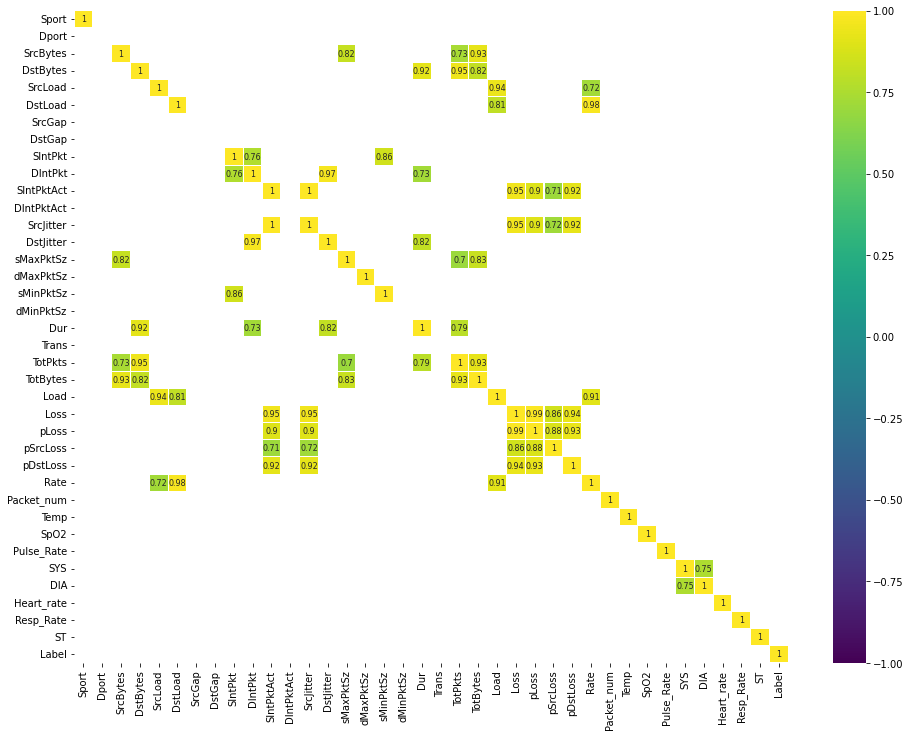

In [ ]:
# Analysing feature to feature relationship
data_num = data.select_dtypes(include = ['float64', 'int64'])
corr = data_num.corr()
plt.figure(figsize=(16, 12))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8});

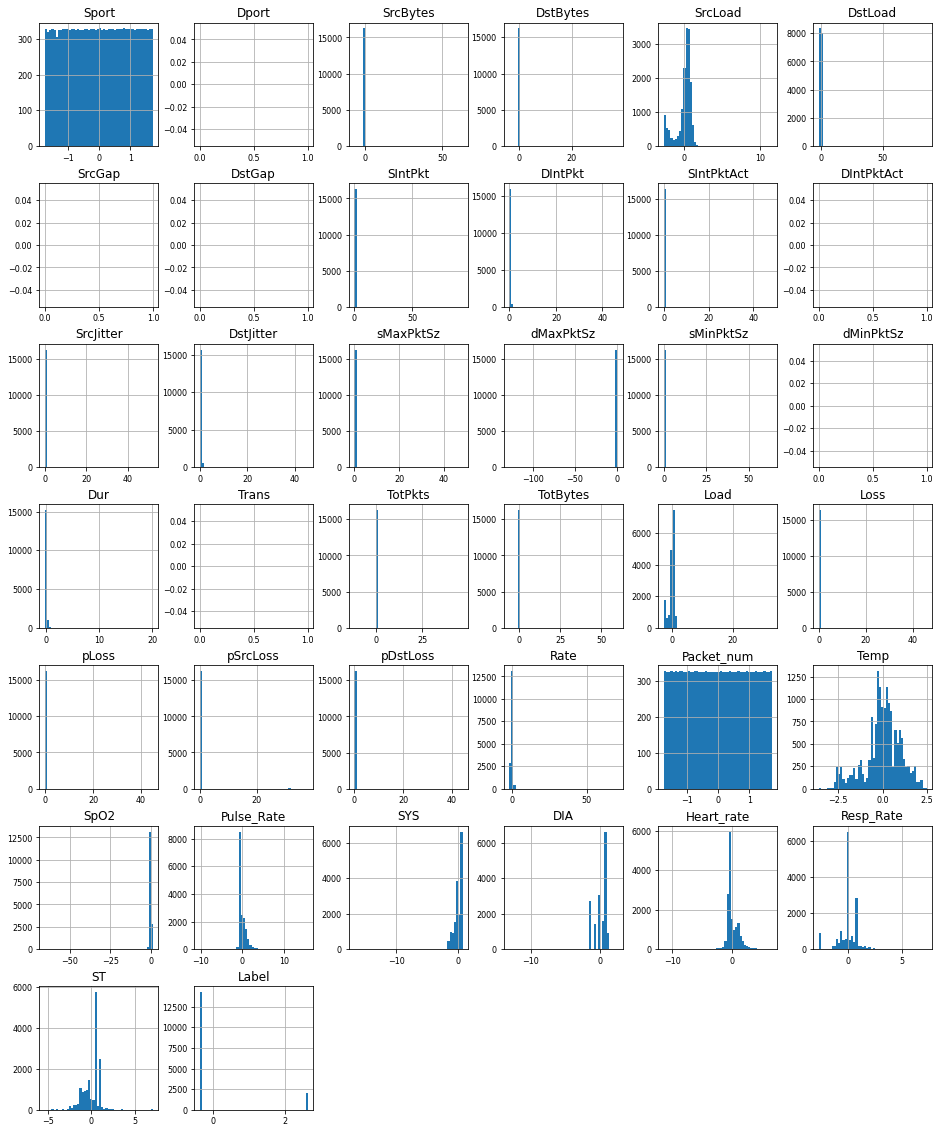

In [ ]:
# Distribution of predictors/features
# A `histogram`_ is a representation of the distribution of data
# This function calls `matplotlib.pyplot.hist`, on each series in the DataFrame
# resulting in one histogram per column
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

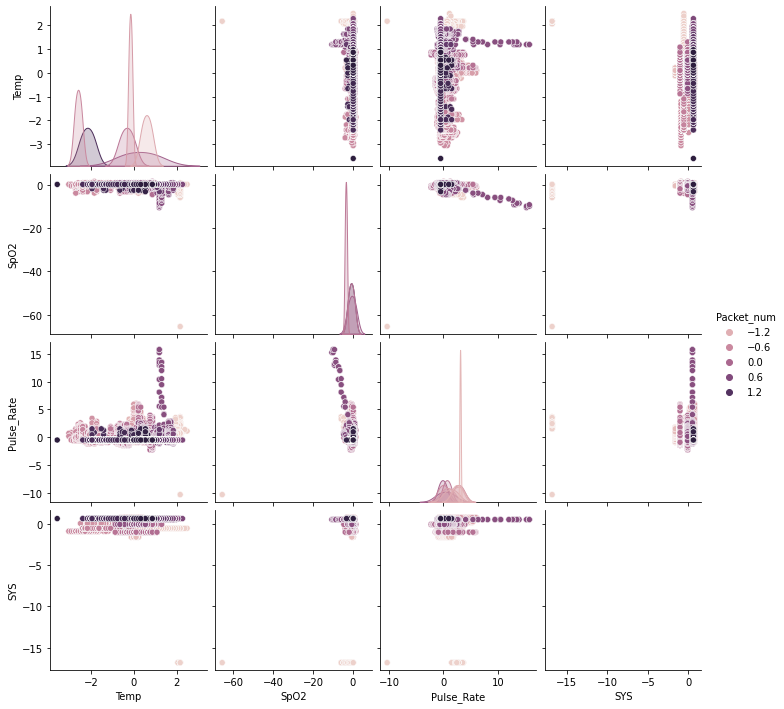

In [ ]:
# Pair plots for bi-variate analyis
sns.pairplot(data, hue='Packet_num', vars=['Temp','SpO2', 'Pulse_Rate', 'SYS'])

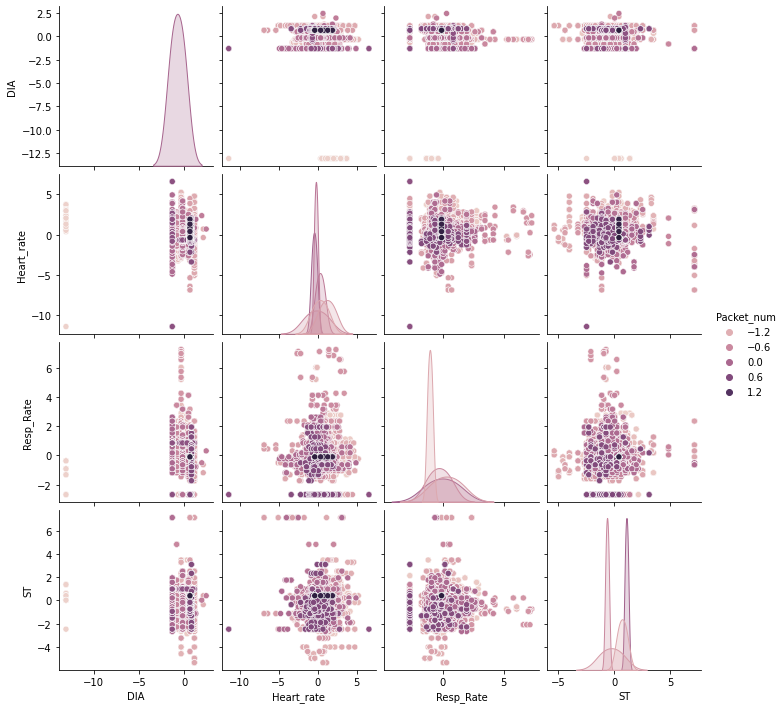

In [ ]:
# Pair plots for bi-variate analyis
sns.pairplot(data, hue='Packet_num', vars=['DIA','Heart_rate','Resp_Rate','ST'])

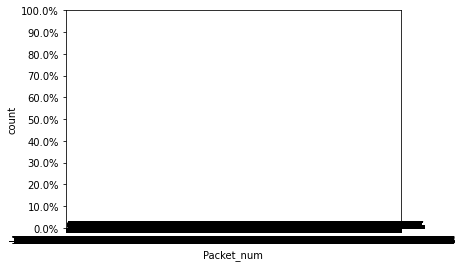

In [ ]:
Y=data
total = len(data)*1.
ax=sns.countplot(x="Packet_num", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

# Data Sampling

In [ ]:
labelencoder = LabelEncoder()
data.iloc[:, -1] = labelencoder.fit_transform(data.iloc[:, -1])

In [ ]:
X = data.drop(['Label'],axis=1).values
y = data.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [ ]:
data.Label.value_counts()

0    14272
1     2046
Name: Label, dtype: int64

# **DATASET PARTITION**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 2,stratify = y)

In [ ]:
print('Number of data points: ',data.shape[0])
print('Number of features: ', data.shape[1])

Number of data points:  16318
Number of features:  38


In [ ]:
X_train.shape

(11422, 37)

In [ ]:
y_train.shape

(11422,)

In [ ]:
X_test.shape

(4896, 37)

In [ ]:
y_test.shape

(4896,)

In [ ]:
pd.Series(y_train).value_counts()

0    9990
1    1432
dtype: int64

# **Feature Selection**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train,)


In [ ]:
# Z-score normalization
features = data.dtypes[data.dtypes != 'object'].index
data[features] = data[features].apply(
    lambda x: (x - x.mean()) / (x.std()))

In [ ]:
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [ ]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break        

In [ ]:
X_fs = data[fs].values

In [ ]:
X_fs.shape

(16318, 10)

In [ ]:
#Taken from https://github.com/SantiagoEG/FCBF_module
import numpy as np

def count_vals(x):
    vals = np.unique(x)
    occ = np.zeros(shape = vals.shape)    
    for i in range(vals.size):
        occ[i] = np.sum(x == vals[i])
    return occ

def entropy(x):
    n = float(x.shape[0])
    ocurrence = count_vals(x)
    px = ocurrence / n
    return -1* np.sum(px*np.log2(px))

def symmetricalUncertain(x,y):
    n = float(y.shape[0])
    vals = np.unique(y)
    # Computing Entropy for the feature x. 
    Hx = entropy(x)
    # Computing Entropy for the feature y.
    Hy = entropy(y)
    #Computing Joint entropy between x and y.
    partial = np.zeros(shape = (vals.shape[0]))
    for i in range(vals.shape[0]):    
       partial[i] = entropy(x[y == vals[i]]) 
    
    partial[np.isnan(partial)==1] = 0      
    py = count_vals(y).astype(dtype = 'float64') / n
    Hxy = np.sum(py[py > 0]*partial) 
    IG = Hx-Hxy
    return 2*IG/(Hx+Hy)

def suGroup(x, n):
    m = x.shape[0]
    x = np.reshape(x, (n,m/n)).T
    m = x.shape[1]
    SU_matrix = np.zeros(shape = (m,m))
    for j in range(m-1):
        x2 = x[:,j+1::]
        y = x[:,j]
        temp = np.apply_along_axis(symmetricalUncertain, 0, x2, y)
        for k in range(temp.shape[0]):
            SU_matrix[j,j+1::] = temp
            SU_matrix[j+1::,j] = temp
    
    return 1/float(m-1)*np.sum(SU_matrix, axis = 1)

def isprime(a):
    return all(a % i for i in xrange(2, a))


"""
get
"""

def get_i(a):
    if isprime(a):
        a -= 1
    return filter(lambda x: a % x == 0, range(2,a))


"""
FCBF - Fast Correlation Based Filter
L. Yu and H. Liu. Feature Selection for High‐Dimensional Data: A Fast Correlation‐Based Filter Solution. 
In Proceedings of The Twentieth International Conference on Machine Leaning (ICML‐03), 856‐863.
Washington, D.C., August 21‐24, 2003.
"""

class FCBF:
    
    idx_sel = []
    
    
    def __init__(self, th = 0.01):
        '''
        Parameters
        ---------------
            th = The initial threshold 
        '''
        self.th = th


    def fit(self, x, y):
        '''
        This function executes FCBF algorithm and saves indexes 
        of selected features in self.idx_sel
        
        Parameters
        ---------------
            x = dataset  [NxM] 
            y = label    [Nx1]
        '''
        self.idx_sel = []
        """
        First Stage: Computing the SU for each feature with the response.
        """
        SU_vec = np.apply_along_axis(symmetricalUncertain, 0, x, y)
        SU_list = SU_vec[SU_vec > self.th]
        SU_list[::-1].sort()
        
        m = x[:,SU_vec > self.th].shape
        x_sorted = np.zeros(shape = m)
        
        for i in range(m[1]):
            ind = np.argmax(SU_vec)
            SU_vec[ind] = 0
            x_sorted[:,i] = x[:,ind].copy()
            self.idx_sel.append(ind)
        
        """
        Second Stage: Identify relationships between feature to remove redundancy.
        """
        j = 0
        while True:
            """
            Stopping Criteria:The search finishes
            """
            if j >= x_sorted.shape[1]: break
            y = x_sorted[:,j].copy()
            x_list = x_sorted[:,j+1:].copy()
            if x_list.shape[1] == 0: break
                
                
            SU_list_2 = SU_list[j+1:]
            SU_x = np.apply_along_axis(symmetricalUncertain, 0, 
                                       x_list, y)
            
            comp_SU = SU_x >= SU_list_2
            to_remove = np.where(comp_SU)[0] + j + 1 
            if to_remove.size > 0:
                x_sorted = np.delete(x_sorted, to_remove, axis = 1)
                SU_list = np.delete(SU_list, to_remove, axis = 0)
                to_remove.sort()
                for r in reversed(to_remove): 
                    self.idx_sel.remove(self.idx_sel[r])
            j = j + 1        
            
    def fit_transform(self, x, y):
        '''
        This function fits the feature selection 
        algorithm and returns the resulting subset.
        
        Parameters
        ---------------
            x = dataset  [NxM] 
            y = label    [Nx1]
        '''
        self.fit(x, y)
        return x[:,self.idx_sel]
         
    def transform(self, x):
        '''
        This function applies the selection
        to the vector x.
        
        Parameters
        ---------------
            x = dataset  [NxM] 
        '''
        return x[:, self.idx_sel]  


"""
FCBF# - Fast Correlation Based Filter 
B. Senliol, G. Gulgezen, et al. Fast Correlation Based Filter (FCBF) with a Different Search Strategy. 
In Computer and Information Sciences (ISCIS ‘08) 23rd International Symposium on, pages 1‐4. 
Istanbul, October 27‐29, 2008.
"""
class FCBFK(FCBF):
    
    idx_sel = []
    
    
    def __init__(self, k = 10):
        '''
        Parameters
        ---------------
            k = Number of features to include in the
            subset.
        '''
        self.k = k


    def fit(self, x, y):
        '''
        This function executes FCBFK algorithm and saves indexes 
        of selected features in self.idx_sel
        
        Parameters
        ---------------
            x = dataset  [NxM] 
            y = label    [Nx1]
        '''        
        self.idx_sel = []
        """
        First Stage: Computing the SU for each feature with the response.
        """    
        SU_vec = np.apply_along_axis(symmetricalUncertain, 0, x, y)
        
        SU_list = SU_vec[SU_vec > 0]
        SU_list[::-1].sort()
        
        m = x[:,SU_vec > 0].shape
        x_sorted = np.zeros(shape = m)
        
        for i in range(m[1]):
            ind = np.argmax(SU_vec)
            SU_vec[ind] = 0
            x_sorted[:,i] = x[:,ind].copy() 
            self.idx_sel.append(ind)
            
        """
        Second Stage: Identify relationships between features to remove redundancy with stopping 
        criteria (features in x_best == k).
        """    
        j = 0
        while True:
            y = x_sorted[:,j].copy()
            SU_list_2 = SU_list[j+1:]    
            x_list = x_sorted[:,j+1:].copy()
            
            """
            Stopping Criteria:The search finishes
            """
            if x_list.shape[1] == 0: break
                
                
            SU_x = np.apply_along_axis(symmetricalUncertain, 0, 
                                       x_list, y)
            
            comp_SU = SU_x >= SU_list_2
            to_remove = np.where(comp_SU)[0] + j + 1 
            if to_remove.size > 0 and x.shape[1] > self.k:
    
                for i in reversed(to_remove):
                    
                    x_sorted = np.delete(x_sorted, i, axis = 1)
                    SU_list = np.delete(SU_list, i, axis = 0)                
                    self.idx_sel.remove(self.idx_sel[i])
                    if x_sorted.shape[1] == self.k: break  
                    
            if x_list.shape[1] == 1 or x_sorted.shape[1] == self.k: 
                break    
            j = j + 1
            
        if len(self.idx_sel) > self.k:
            self.idx_sel = self.idx_sel[:self.k]
            
            
            
"""
FCBFiP - Fast Correlation Based Filter in Pieces
"""            
            
class FCBFiP(FCBF):
    
    idx_sel = []


    def __init__(self, k = 10, npieces = 2):
        '''
        Parameters
        ---------------
            k = Number of features to include in the
            subset.
            npieces = Number of pieces to divide the 
            feature space.
        '''
        self.k = k
        self.npieces = npieces

    def fit(self, x, y):
        '''
        This function executes FCBF algorithm and saves indexes 
        of selected features in self.idx_sel
        
        Parameters
        ---------------
            x = dataset  [NxM] 
            y = label    [Nx1]
        '''
    
        """
        First Stage: Computing the SU for each feature with the response. We sort the 
        features. When we have a prime number of features we remove the last one from the
        sorted features list.
        """      
        m = x.shape
        nfeaturesPieces = int(m[1] / float(self.npieces))        
        SU_vec = np.apply_along_axis(symmetricalUncertain, 0, x, y)
        
        x_sorted = np.zeros(shape = m, dtype = 'float64')        
        idx_sorted = np.zeros(shape = m[1], dtype = 'int64')
        for i in range(m[1]):
            ind = np.argmax(SU_vec)
            SU_vec[ind] = -1
            idx_sorted[i]= ind 
            x_sorted[:,i] = x[:,ind].copy() 

        if isprime(m[1]): 
            x_sorted = np.delete(x_sorted, m[1]-1, axis = 1 )
            ind_prime = idx_sorted[m[1]-1]
            idx_sorted = np.delete(idx_sorted, m[1]-1)
            #m = x_sorted.shape
        """
        Second Stage: Identify relationships between features into its vecinity
        to remove redundancy with stopping criteria (features in x_best == k).
        """   
        
        x_2d = np.reshape(x_sorted.T, (self.npieces, nfeaturesPieces*m[0])).T
    
        SU_x =  np.apply_along_axis(suGroup, 0, x_2d, nfeaturesPieces)
        SU_x = np.reshape(SU_x.T, (self.npieces*nfeaturesPieces,))
        idx_sorted2 = np.zeros(shape = idx_sorted.shape, dtype = 'int64')
        SU_x[np.isnan(SU_x)] = 1        
        
        for i in range(idx_sorted.shape[0]):
            ind =  np.argmin(SU_x)
            idx_sorted2[i] = idx_sorted[ind]
            SU_x[ind] = 10    
        
        """
        Scoring step
        """        
        self.scores = np.zeros(shape = m[1], dtype = 'int64') 
           
        for i in range(m[1]):
            if i in idx_sorted:
                self.scores[i] = np.argwhere(i == idx_sorted) + np.argwhere(i == idx_sorted2)
        if isprime(m[1]): 
            self.scores[ind_prime] = 2*m[1]
        self.set_k(self.k)


    def set_k(self, k):
        self.k = k 
        scores_temp = -1*self.scores
        
        self.idx_sel = np.zeros(shape = self.k, dtype = 'int64')
        for i in range(self.k):
            ind =  np.argmax(scores_temp)
            scores_temp[ind] = -100000000
            self.idx_sel[i] = ind

In [ ]:
fcbf = FCBFK(k = 20)

In [ ]:
X_fss = fcbf.fit_transform(X_fs,y)

In [ ]:
X_fss.shape

(16318, 10)

# **Resplitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fss,y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = y)


In [ ]:
X_train.shape

(11422, 10)

In [ ]:
pd.Series(y_train).value_counts()

0    9990
1    1432
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={2:1000,4:1000})

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_train).value_counts()

0    9990
1    9990
dtype: int64

## **BUILDING AND FITTING MODELS**






# **EVALUATE AND VALIDATING MODELS**

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
models = []

In [ ]:
#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, y_train); 
models.append(('KNeighborsClassifier', KNN_Classifier))


In [ ]:
#Support Vector Classifier
from sklearn.svm import SVC
qsvm=SVC(kernel='poly',gamma='scale')
qsvm.fit(X_train,y_train) 
models.append(('SupportVectorClassifier',qsvm))

In [ ]:
#XGBoost
import xgboost as xgb
from xgboost import plot_importance
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
models.append(('XGBoost',xg))


'\nxg_score=xg.score(X_test,y_test)\ny_predict=xg.predict(X_test)\ny_true=y_test\nprint(\'Accuracy of XGBoost: \'+ str(xg_score))\nprecision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average=\'weighted\') \nprint(\'Precision of XGBoost: \'+(str(precision)))\nprint(\'Recall of XGBoost: \'+(str(recall)))\nprint(\'F1-score of XGBoost: \'+(str(fscore)))\nprint(classification_report(y_true,y_predict))\ncm=confusion_matrix(y_true,y_predict)\nf,ax=plt.subplots(figsize=(5,5))\nsns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)\nplt.xlabel("y_pred")\nplt.ylabel("y_true")\nplt.show()\n'

In [ ]:
#Naive Bayes Bernoulli
from sklearn.naive_bayes import BernoulliNB
BNB_Classifier = BernoulliNB()
bnbc=BNB_Classifier.fit(X_train, y_train)
models.append(('Naive Bayes Bernoulli',bnbc))

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, y_train);
models.append(('LogisticRegression', LGR_Classifier))

In [ ]:
#Evaluating
for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()



============================== KNeighborsClassifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9024024024024022

Model Accuracy:
 0.9364864864864865

Confusion matrix:
 [[9043  947]
 [ 322 9668]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.93      9990
           1       0.91      0.97      0.94      9990

    accuracy                           0.94     19980
   macro avg       0.94      0.94      0.94     19980
weighted avg       0.94      0.94      0.94     19980



============================== SupportVectorClassifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.7277777777777779

Model Accuracy:
 0.7280780780780781

Confusion matrix:
 [[9912   78]
 [5355 4635]]

Classification report:
               precision    recall  f1-score   support

           0       0.65      0.99      0.78      9990
           1       0.98      0.46      0

In [ ]:
#Validating
for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print() 


============================== KNeighborsClassifier Model Test Results ==============================

Model Accuracy:
 0.8513071895424836

Confusion matrix:
 [[3681  601]
 [ 127  487]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      4282
           1       0.45      0.79      0.57       614

    accuracy                           0.85      4896
   macro avg       0.71      0.83      0.74      4896
weighted avg       0.90      0.85      0.87      4896



============================== SupportVectorClassifier Model Test Results ==============================

Model Accuracy:
 0.9227941176470589

Confusion matrix:
 [[4245   37]
 [ 341  273]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4282
           1       0.88      0.44      0.59       614

    accuracy                           0.92      4896
   macro avg       0.90    

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                550       
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 1s 52ms/step - loss: 0.7891 - accuracy: 0.2666 - val_loss: 0.6965 - val_accuracy: 0.5038
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.7473 - accuracy: 0.3199 - val_loss: 0.6526 - val_accuracy: 0.7477
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.7127 - accuracy: 0.4163 - val_loss: 0.6234 - val_accuracy: 0.6619
Epoch 4/100
4/4 [================

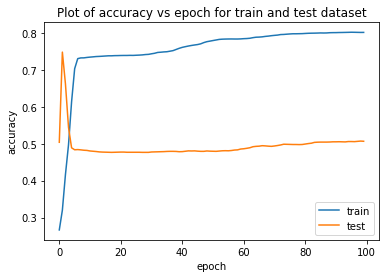

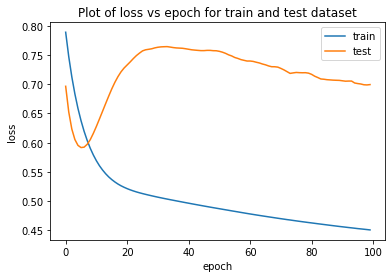

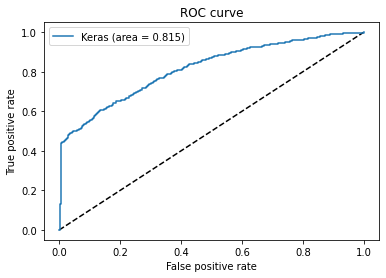

Recall Score -  0.4739413680781759
F1 Score -  0.5645004849660523
Precision Score -  0.697841726618705


In [ ]:
#MultiLayer Perceptron Classifier
from keras.layers import Dense 
from keras.models import Sequential
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# representation of model layers
from keras.utils.vis_utils import plot_model

mlp = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with sigmoid activation
mlp.add(Dense(units=1,activation='sigmoid'))


# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# summary of model layers
mlp.summary()

# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('mlp_binary_accuracy.png')
plt.show()

# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot of loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('mlp_binary_loss.png')
plt.show()

y_pred = mlp.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('mlp_binary_roc.png')
plt.show()

pred = mlp.predict(X_test)
y_classes = (mlp.predict(X_test)>0.5).astype('int32')

print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

